<a href="https://colab.research.google.com/github/classical16/gomycode/blob/main/data_visualization_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset into a data frame using Python.
Clean the data as needed.
Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. Interpret the results.
Zoom in to only include data between 1980 and 2005, try to customize the axes labels.
Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained results.
Select the best chart to show the Average temperature per country.
Make your own questions about the dataset and try to answer them using the appropriate visuals.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('/content/Africa_climate_change (1).csv')


In [3]:
df

DATE  PRCP  TAVG  TMAX  TMIN   COUNTRY
0       19800101 000000   NaN  54.0  61.0  43.0   Tunisia
1       19800101 000000   NaN  49.0  55.0  41.0   Tunisia
2       19800101 000000   0.0  72.0  86.0  59.0  Cameroon
3       19800101 000000   NaN  50.0  55.0  43.0   Tunisia
4       19800101 000000   NaN  75.0  91.0   NaN  Cameroon
...                 ...   ...   ...   ...   ...       ...
464810  20230823 000000   NaN  85.0  89.0   NaN   Senegal
464811  20230823 000000   NaN  80.0  90.0  72.0     Egypt
464812  20230823 000000   NaN  87.0   NaN  73.0     Egypt
464813  20230823 000000   0.0  82.0  94.0   NaN   Senegal
464814  20230823 000000   NaN  83.0   NaN   NaN  Cameroon

[464815 rows x 6 columns]

In [4]:
df.describe()

PRCP           TAVG           TMAX           TMIN
count  177575.000000  458439.000000  363901.000000  332757.000000
mean        0.120941      77.029838      88.713969      65.548262
std         0.486208      11.523634      13.042631      11.536547
min         0.000000     -49.000000      41.000000      12.000000
25%         0.000000      70.000000      81.000000      58.000000
50%         0.000000      80.000000      90.000000      68.000000
75%         0.010000      85.000000      99.000000      74.000000
max        19.690000     110.000000     123.000000      97.000000

In [5]:
missing_values = df.isnull()
print(missing_values.sum())

DATE            0
PRCP       287240
TAVG         6376
TMAX       100914
TMIN       132058
COUNTRY         0
dtype: int64


In [6]:
df['TMAX'].fillna(2 * df['TAVG'] - df['TMIN'], inplace=True)

In [7]:
df['TMIN'].fillna(2 * df['TAVG'] - df['TMAX'], inplace=True)

In [8]:
df['TAVG'].fillna((df['TMAX'] + df['TMIN']) / 2, inplace=True)

In [9]:
df = df.drop('PRCP', axis=1)

In [10]:
missing_values = df.isnull()
print(missing_values.sum())

DATE           0
TAVG        2223
TMAX       45128
TMIN       45128
COUNTRY        0
dtype: int64


In [11]:
df.dropna(inplace=True)

In [12]:
df.describe()

TAVG           TMAX           TMIN
count  419685.000000  419685.000000  419685.000000
mean       77.010295      88.574915      65.701045
std        11.586884      13.026556      11.599562
min        37.000000      41.000000      12.000000
25%        70.000000      80.000000      58.000000
50%        80.000000      90.000000      68.000000
75%        85.000000      98.000000      74.000000
max       109.000000     136.000000     103.000000

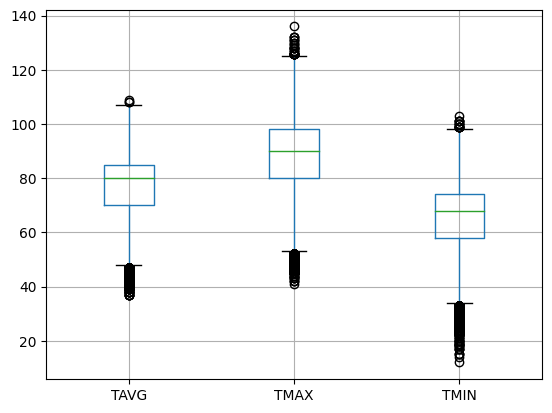

In [13]:
df.boxplot()
plt.show()

In [14]:
summary_stats = df.describe()
print(summary_stats)

                TAVG           TMAX           TMIN
count  419685.000000  419685.000000  419685.000000
mean       77.010295      88.574915      65.701045
std        11.586884      13.026556      11.599562
min        37.000000      41.000000      12.000000
25%        70.000000      80.000000      58.000000
50%        80.000000      90.000000      68.000000
75%        85.000000      98.000000      74.000000
max       109.000000     136.000000     103.000000


In [15]:
# prompt: Using dataframe df: drop outliers

df[df.isin(df.quantile([0.05, 0.95], numeric_only=True))]


DATE  TAVG  TMAX  TMIN COUNTRY
0       NaN   NaN   NaN   NaN     NaN
1       NaN   NaN   NaN   NaN     NaN
2       NaN   NaN   NaN   NaN     NaN
3       NaN   NaN   NaN   NaN     NaN
4       NaN   NaN   NaN   NaN     NaN
...     ...   ...   ...   ...     ...
464809  NaN   NaN   NaN   NaN     NaN
464810  NaN   NaN   NaN   NaN     NaN
464811  NaN   NaN   NaN   NaN     NaN
464812  NaN   NaN   NaN   NaN     NaN
464813  NaN   NaN   NaN   NaN     NaN

[419685 rows x 5 columns]

In [16]:
 # IDENTIFY OUTLIERS BASED ON A SPECIFIC COLUMN
column_name = 'TMAX'
Q1 = df['TMAX'].quantile(0.25)
Q3 = df['TMAX'].quantile(0.75)
IGR =Q3 - Q1

In [17]:
# DEFINE THE LOWER AND UPPER BOUNDS FOR OUTLIERS
lower_bound = Q1 - 1.5 * IGR
upper_bound = Q3 + 1.5 * IGR

In [47]:
column_name = 'TMIN'
Q1 = df['TMIN'].quantile(0.25)
Q3 = df['TMIN'].quantile(0.75)
IQR =Q3 - Q1

In [19]:
lower_bound = Q1 - 1.5 * IGR
upper_bound = Q3 + 1.5 * IGR

In [20]:
column_name = 'TAVG'
Q1 = df['TAVG'].quantile(0.25)
Q3 = df['TAVG'].quantile(0.75)
IGR =Q3 - Q1

In [21]:
lower_bound = Q1 - 1.5 * IGR
upper_bound = Q3 + 1.5 * IGR

In [22]:
# FILTER DATAFRAMES TO ECLUDE ROWS WITH OUTLIERS
df_no_outliers = df[((df['TMAX'] >= lower_bound) & (df['TMAX'] <= upper_bound))
  & ((df['TMIN'] >= lower_bound)& (df['TMIN'] <= upper_bound))
  & (df['TAVG'] >= lower_bound) & (df['TAVG'] <= upper_bound)]
print(df_no_outliers)

                   DATE  TAVG   TMAX  TMIN   COUNTRY
2       19800101 000000  72.0   86.0  59.0  Cameroon
4       19800101 000000  75.0   91.0  59.0  Cameroon
6       19800101 000000  76.0   97.0  59.0   Senegal
7       19800101 000000  74.0   95.0  59.0   Senegal
8       19800101 000000  78.0   93.0  63.0   Senegal
...                 ...   ...    ...   ...       ...
464809  20230823 000000  85.0   96.0  77.0   Tunisia
464810  20230823 000000  85.0   89.0  81.0   Senegal
464811  20230823 000000  80.0   90.0  72.0     Egypt
464812  20230823 000000  87.0  101.0  73.0     Egypt
464813  20230823 000000  82.0   94.0  70.0   Senegal

[359160 rows x 5 columns]


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419685 entries, 0 to 464813
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     419685 non-null  object 
 1   TAVG     419685 non-null  float64
 2   TMAX     419685 non-null  float64
 3   TMIN     419685 non-null  float64
 4   COUNTRY  419685 non-null  object 
dtypes: float64(3), object(2)
memory usage: 19.2+ MB


In [24]:
# convert Date column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

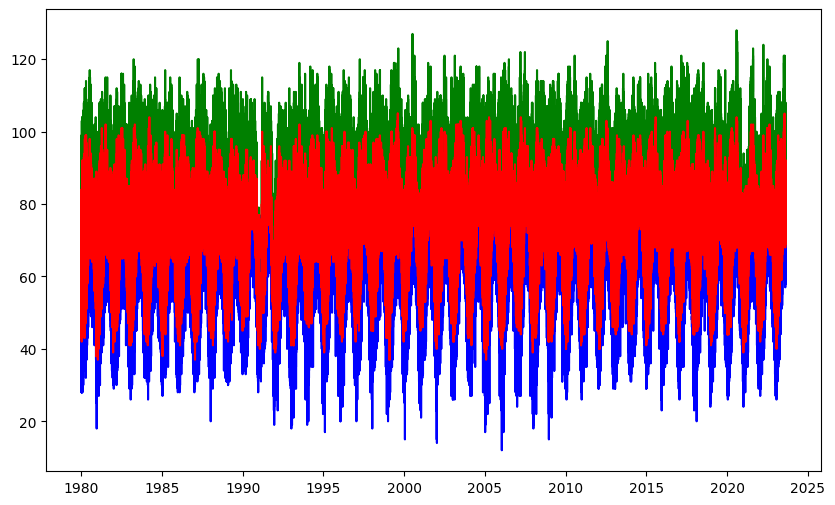

In [46]:
  # plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(new_df['DATE'],new_df['TMAX'], color="green")
plt.plot(new_df['DATE'],new_df['TMIN'], color="blue")
plt.plot(new_df['DATE'],new_df['TAVG'], color="red")

In [26]:
average_TAVG = df['TAVG'].mean()
df

DATE  TAVG   TMAX  TMIN   COUNTRY
0      1980-01-01  54.0   61.0  43.0   Tunisia
1      1980-01-01  49.0   55.0  41.0   Tunisia
2      1980-01-01  72.0   86.0  59.0  Cameroon
3      1980-01-01  50.0   55.0  43.0   Tunisia
4      1980-01-01  75.0   91.0  59.0  Cameroon
...           ...   ...    ...   ...       ...
464809 2023-08-23  85.0   96.0  77.0   Tunisia
464810 2023-08-23  85.0   89.0  81.0   Senegal
464811 2023-08-23  80.0   90.0  72.0     Egypt
464812 2023-08-23  87.0  101.0  73.0     Egypt
464813 2023-08-23  82.0   94.0  70.0   Senegal

[419685 rows x 5 columns]

In [27]:
new_df = df[(df['COUNTRY'] == 'Cameroon') | (df['COUNTRY'] == 'Tunisia')]
new_df

DATE  TAVG   TMAX  TMIN   COUNTRY
0      1980-01-01  54.0   61.0  43.0   Tunisia
1      1980-01-01  49.0   55.0  41.0   Tunisia
2      1980-01-01  72.0   86.0  59.0  Cameroon
3      1980-01-01  50.0   55.0  43.0   Tunisia
4      1980-01-01  75.0   91.0  59.0  Cameroon
...           ...   ...    ...   ...       ...
464791 2023-08-23  80.0   93.0  67.0  Cameroon
464794 2023-08-23  71.0   84.0  58.0  Cameroon
464799 2023-08-23  90.0  102.0  80.0   Tunisia
464804 2023-08-23  84.0   98.0  70.0   Tunisia
464809 2023-08-23  85.0   96.0  77.0   Tunisia

[103066 rows x 5 columns]

In [28]:
new_df1 = new_df.groupby(['COUNTRY', 'DATE'])['TAVG'].mean()
new_df1

COUNTRY   DATE      
Cameroon  1980-01-01    77.000000
          1980-01-02    77.333333
          1980-01-03    80.000000
          1980-01-04    75.333333
          1980-01-05    76.000000
                          ...    
Tunisia   2023-08-19    88.250000
          2023-08-20    86.500000
          2023-08-21    84.750000
          2023-08-22    84.500000
          2023-08-23    86.500000
Name: TAVG, Length: 28535, dtype: float64

In [29]:
new_df2 = new_df1.reset_index()

In [30]:
# plot a line chart
fig = px.line(new_df2, x="DATE", y="TAVG", color="COUNTRY", title='average Temperature Flunctuation', labels={'x': 'DATE', "y": 'TAVG'})
fig.show()

In [31]:
subset_df = df[(df['COUNTRY'] == 'Senegal')]
subset_df1 = subset_df[(subset_df['DATE'] >= '1980') & (subset_df['DATE'] <='2005')]
subset_df1

DATE  TAVG  TMAX  TMIN  COUNTRY
6      1980-01-01  76.0  97.0  59.0  Senegal
7      1980-01-01  74.0  95.0  59.0  Senegal
8      1980-01-01  78.0  93.0  63.0  Senegal
9      1980-01-01  76.0  91.0  59.0  Senegal
11     1980-01-01  84.0  99.0  69.0  Senegal
...           ...   ...   ...   ...      ...
249442 2005-01-01  75.0  81.0  69.0  Senegal
249443 2005-01-01  76.0  84.0  68.0  Senegal
249444 2005-01-01  74.0  88.0  60.0  Senegal
249445 2005-01-01  73.0  81.0  65.0  Senegal
249464 2005-01-01  78.0  89.0  67.0  Senegal

[100497 rows x 5 columns]

In [32]:
fig = px.line(subset_df, x="DATE", y="TAVG", color="COUNTRY", title='average Temperature Flunctuation', labels={'x': 'DATE', "y": 'TAVG'})
fig.show()

In [33]:
subset_df2 = subset_df[(subset_df['DATE'] >= '1980') & (subset_df['DATE'] <='2000')]
subset_df3 = subset_df[(subset_df['DATE'] >= '2000') & (subset_df['DATE'] <='2023')]

In [34]:
fig1 = px.histogram(subset_df2, x='TAVG', nbins=5,color = "COUNTRY", color_discrete_map={"Senegal": 'red'})
fig2 = px.histogram(subset_df3, x='TAVG', nbins=5,color = "COUNTRY",color_discrete_map={"Senegal": 'blue'})
fig = go.Figure(data = fig1.data + fig2.data)
fig.show()

In [35]:
new_df5 = df.groupby(['COUNTRY'])['TAVG'].mean()
new_df5

COUNTRY
Angola      76.416228
Cameroon    79.544423
Egypt       73.845316
Senegal     83.013183
Tunisia     67.675703
Name: TAVG, dtype: float64

In [36]:
new_df6 = new_df5.reset_index()

In [37]:
new_df6.dtypes

COUNTRY     object
TAVG       float64
dtype: object

In [38]:
fig=px.bar(new_df6, x='COUNTRY', y='TAVG')
fig.show()